# Аналитический кейс: интернет-магазин компьютерных игр

Уже более 20-ти лет компьютерные игры являются едва ли не основным инструментом для отдыха, знакомства с людьми со схожими интересами и даже обучения. Не удивительно, что они популярны по всему миру среди людей всех возрастов. Некоторые из игр достигают оглушительного успеха, становясь культовыми, а о некоторых забывают спустя пару недель релиза.

Что лежит в основе успешной игры? Влияет ли на успешность платформа? Какой жанр наиболее популярен?

Разберемся на примере данных интернет-магазина, который продаёт компьютерные игры по всему миру.

**Цель:** 

    По данным о продажах игр, оценкам пользователей и экспертов, жанрам и платформам:
    
    - Выявить определяющие успешность игры закономерности;
    - Определить  потенциально популярный продукт;
    - Спланировать рекламные кампании на следующий год.
     

**Основные этапы:**

1. Обзор данных;
2. Предобработка данных;
3. Исследовательский анализ данных:
  - Cколько игр выпускалось в разные годы;
  - Зависимость числа продаж от платформы;
  - Актуальный период;
  - Потенциально прибыльные платформы;
  - Диаграмма размаха по глобальным продажам игр в разбивке по платформам;
  - Влияние отзывов пользователей и критиков на продажи внутри одной популярной платформы 
4. Портрет пользователя каждого региона
 - Самые популярные платформы
 - Самые популярные жанры
 - Влияние рейтинга ESRB на продажи в отдельном регионе
5. Проверка гипотез 
 - Гипотеза: средние пользовательские рейтинги платформ Xbox One и PC одинаковые 
 - Гипотеза: средние пользовательские рейтинги жанров Action и Sports одинаковые

*ESRB (Entertainment Software Rating Board) — ассоциация, определяющая возрастной рейтинг компьютерных игр*

  ## Изучение общей информации

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB
                        Name Platform  Year_of_Release         Genre  \
0                 Wii Sports      Wii           2006.0        Sports   
1          Super Mario Bros.      NES           1985.0      Platform   
2             Mario Kart 

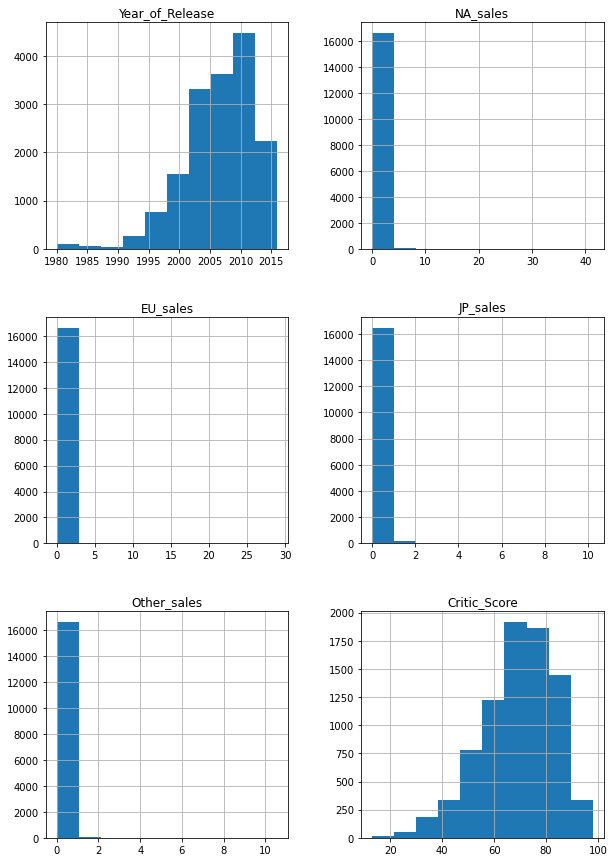

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('/datasets/games.csv')
df.info()
print(df.head(10))
df.hist(figsize=(10, 15))
plt.show()

Графики продаж неинформативны - слишком много игр купили менее миллиона раз. В дальнейшем, исследование будет проводиться по сумме продаж, поэтому соответствующая проверка на выбросы, если она будет нужна, будет проведена по сумме продаж.  

## Предобработка данных

### Столбцы к нижему регистру

In [2]:
df.columns = df.columns.str.lower()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


### Обработка пропусков

Возможные причин возникновения пропусков:

- **name** - Пропусков очень мало, скорее всего, они случайные.


- **year_of_release** - Пропусков мало, скорее всего, они случайные.


- **genre** - Пропусков очень мало, скорее всего, они случайные.


- **critic_score** - Пропуски могут означать, что игра непопулярная или недвано вышла, и ее еще не успели оценить. Таких пропусков больше, чем пропусков в 'user_score', тк критиков меньше, чем пользователей. До непопулярных игр критики доходят реже, чем обычные пользователи.


- **user_score** - Пропуски могут означать, что игра непопулярная или недвано вышла, и ее еще не успели оценить.


- **rating** - Пропуски означают, что игра не была оценена организацией ESRB. Возможно, она непопулярная или недавно вышла и ее еще не успели оценить.

In [3]:
print(df.isna().sum())
(pd.DataFrame(round(df.isna().mean()*100,))
   .style.background_gradient('inferno'))

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64


,0
name,0.000000
platform,0.000000
year_of_release,2.000000
genre,0.000000
na_sales,0.000000
eu_sales,0.000000
jp_sales,0.000000
other_sales,0.000000
critic_score,51.000000
user_score,40.000000


В столбцах name, year_of_release, genre пропусков менее 5% - их можно удалить.

In [4]:
df = df.dropna(subset=['name','year_of_release','genre'])

В столбцах 'critic_score', 'user_score', 'rating' пропуски было бы логично заменить на медианные значения относительно жанров игр. Однако на 16к элементов таблицы примерно 11к разных жанров. Замена на общую медиану испортит данные. 

'tbd'(to be determined - будет определено) в столбце с оценкой пользователей означает отсутствие оценки. Заменим на NaN.

Рейтинги пользователей и экспертов - положительные. Изменим пропуски на -1, чтобы в дальнейшем изменить тип данных столбцов с рейтингами.

In [5]:
import numpy as np
df.loc[df['user_score'] == 'tbd'] = np.nan
df['critic_score'] = df['critic_score'].fillna(-1)
df['user_score'] = df['user_score'].fillna(-1)
df['rating'] = df['rating'].fillna('None')
print(df['rating'].unique()) #В этом столбце оставим пропуски как nan

['E' 'None' 'M' 'T' 'E10+' 'K-A' 'AO' 'EC' 'RP']


### Меняем тип данных

В столбцах:
- year_of_release - Год выпуска - целое число.
- critic_score - Оценка критика ∈ [0,100], можно округлить до целых.
- user_score - Оценка пользователей ∈ [0,10], дробная часть может ощутимо повлиять на результат, преобразуем в вещественные числа.

In [6]:
df = df.dropna(subset=['year_of_release'])
df['year_of_release'] = df['year_of_release'].astype('int')
df['critic_score']=df['critic_score'].astype('int')
df['user_score']=df['user_score'].astype('float')

### Проверка на наличие  дубликатов

In [7]:
df.duplicated().sum()

0

Явных дубликатов нет.

In [8]:
duplicated = df[['name','platform']].duplicated()
print(duplicated.count())
print(df.loc[duplicated]['platform'].unique())

14068
['X360' 'PC' 'PS3']


**Удаление дубликатов по столбцам 'platform' и 'name'**

In [9]:
df[df[['name', 'platform']].duplicated(keep = False)]
df = df.drop_duplicates(subset = ['name', 'platform'], keep = 'last') 

### Добавление столбца с суммарными продажами

In [10]:
df['all_sales'] = df.loc[:,['na_sales','other_sales']].sum(axis=1)
print(df.head())

                       name platform  year_of_release         genre  na_sales  \
0                Wii Sports      Wii             2006        Sports     41.36   
1         Super Mario Bros.      NES             1985      Platform     29.08   
2            Mario Kart Wii      Wii             2008        Racing     15.68   
3         Wii Sports Resort      Wii             2009        Sports     15.61   
4  Pokemon Red/Pokemon Blue       GB             1996  Role-Playing     11.27   

   eu_sales  jp_sales  other_sales  critic_score  user_score rating  all_sales  
0     28.96      3.77         8.45            76         8.0      E      49.81  
1      3.58      6.81         0.77            -1        -1.0   None      29.85  
2     12.76      3.79         3.29            82         8.3      E      18.97  
3     10.93      3.28         2.95            80         8.0      E      18.56  
4      8.89     10.22         1.00            -1        -1.0   None      12.27  


### Общий итог раздела

 - Заменены (переведены к нижнему регистру) названия столбцов;
 - Пропуски в данных изучены и устранены там, где это возможно;
 - Изменены типы данных в соответствии с содержанием столбцов;
 - Выполнена проверка на наличие явных дубликатов (их не оказалось), устранены дубликаты по столбцам 'name' и 'platform';
 - Добавлен столбец с суммой продаж во всех регионах.

## исследовательский анализ данных

### Cколько игр выпускалось в разные годы

<AxesSubplot:>

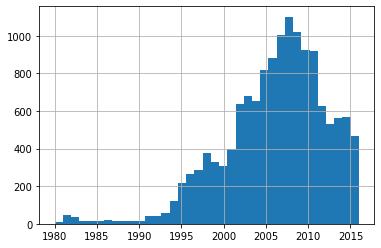

In [11]:
df['year_of_release'].hist(bins=37, grid=True)

До 1994 г. выпускалось значительно меньше игр, чем в остальное время. Поэтому данные за период до 1994 можно не рассматривать.

<AxesSubplot:>

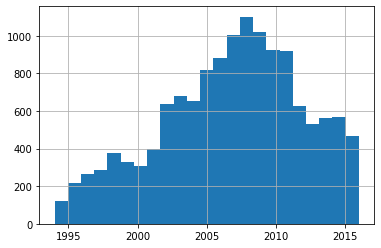

In [12]:
df['year_of_release'].hist(bins=23, grid=True, range=(1994,2016))

### Зависимость числа продаж от платформы

          all_sales
platform           
PS2          723.56
X360         668.97
PS3          514.83
Wii          482.77
PS           367.10
DS           326.28
XB           178.65
PS4          156.95
GBA          156.90
N64          143.22


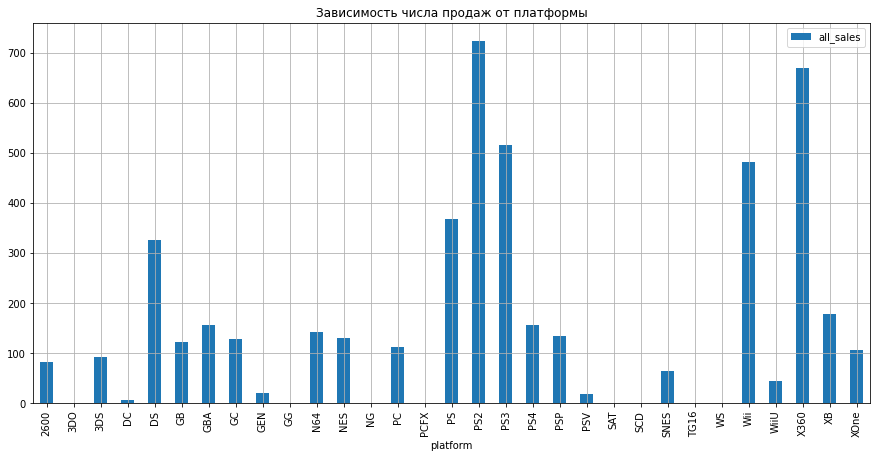

In [13]:
(df.pivot_table(index='platform', values='all_sales',  aggfunc='sum')
    .plot(kind='bar', grid=True, figsize=(15,7), title = 'Зависимость числа продаж от платформы'))
top_platforms = (df.pivot_table(index='platform', values='all_sales', aggfunc='sum')
      .sort_values(by='all_sales', ascending= False)
      .head(10))
print(top_platforms)

Платформы с наибольшими суммарными продажами:
 - PS2
 - X360 
 - PS3
 - Wii
 - PS       

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


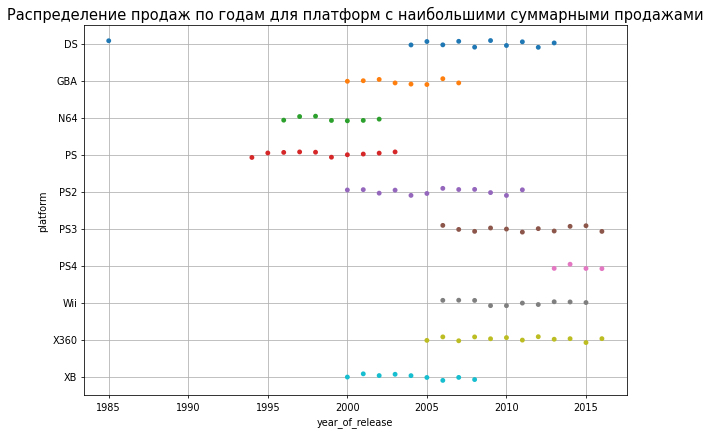

In [14]:
import seaborn as sns

df_counts = df.groupby(['platform', 'year_of_release']).size().reset_index(name='counts')
df_counts = df_counts.loc[df_counts['platform'].isin(top_platforms.index)]

fig, ax = plt.subplots(figsize=(10,7), dpi= 70)    
sns.stripplot(df_counts.year_of_release, df_counts.platform,  ax=ax)

plt.title('Распределение продаж по годам для платформ с наибольшими суммарными продажами', fontsize=15)
plt.grid(visible=True)
plt.show()

Согласно графику, период популярности одной платформы - примерно 10 лет.

### Актуальный период

Для дальнейшего исследования будем использовать данные за последние 3 года. За это время можно будет отследить какие платформы находятся на пике продаж, а какие только набирают популярность.

In [15]:
df = df.loc[df['year_of_release']>=2013]

### Потенциально прибыльные платформы

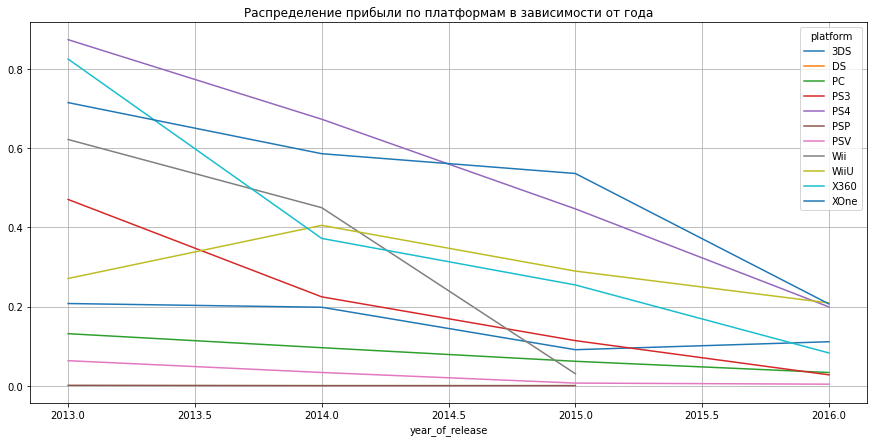

In [16]:
(df.pivot_table(index='year_of_release', values='all_sales',columns='platform')
    .plot(grid=True, figsize=(15,7), title = 'Распределение прибыли по платформам в зависимости от года'))
plt.show()

Практически все платформы к 2016 году имеют нисходящий тренд. 
 
❌ Платформы, которые к 2016 году прерстали быть популярными:
 - PS2
 - Wii
 - DS
 - PSP
 
 Для наглядности, построим новый график уже без этих платформ.

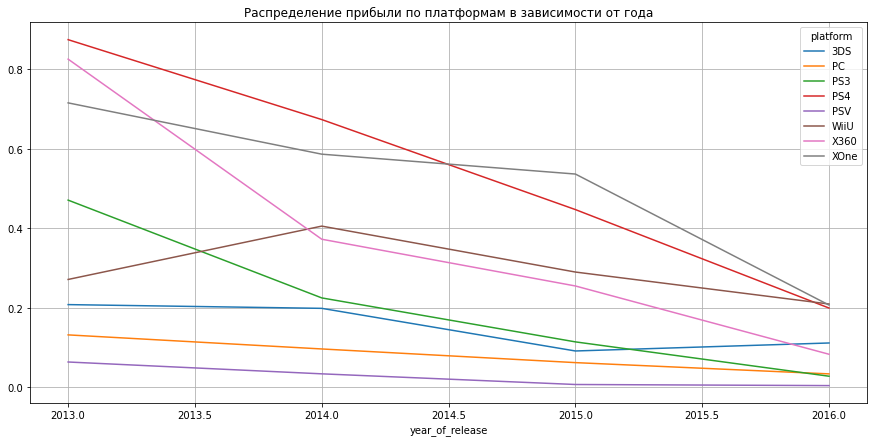

In [17]:
(df.loc[~df['platform'].isin(['PS2','Wii','DS','PSP'])]
    .pivot_table(index='year_of_release', values='all_sales',columns='platform')
    .plot(grid=True, figsize=(15,7), title = 'Распределение прибыли по платформам в зависимости от года'))
plt.show()

✔️ Среди платформ можно выделить несколько, которые появились недавно:
 - PS4 - Более современный аналог платформы PS3. 
 - XOne - Более современный аналог платформы Xone.
 - WiiU - Более современный аналог платформы Wii.
 
 PS3, Xone, Wii - Уже известные, зарекомендововшие себя платформы. Пользователи не спешат покупать их более современные аналоги из соображений экономии. Однако, судя по графикам этих платформ, их популярность постепенно угасает, освобождая дорогу более перспективным платформам **PS4, XOne, WiiU. Именно эти платформы являются потенциально прибыльными.**
 
 
 - 3DS, PSV - На конец 2016 года, эти платформы существует уже 5 лет. За этот период, роста прибыли практически не было. Тк характерный срок исчезновения старых платформ - 10 лет, ожидать роста прибыли в 2017 году от этих платформ не стоит.


Давно существующие платформы:
 - PC - Самая популярная платформа, которая существует уже более 20 лет. График достаточно пологий, и вряд ли в 2017 году сильно изменится.
 - PS3 - График имеет нисходящий тренд, платформа существует более 6 лет, нельзя ожидать от нее роста на следующий год. Также отметим, что у платформы в 2013 году появился более современный аналог - PS4.
 - X360 - Аналогично PS3, график имеет нисходящий тренд, платформа существует более 6 лет и нельзя ожидать от нее роста на следующий год. В 2013 году у платформы X360 появился более современный аналог - XOne.
 

### Диаграмма размаха по глобальным продажам игр в разбивке по платформам

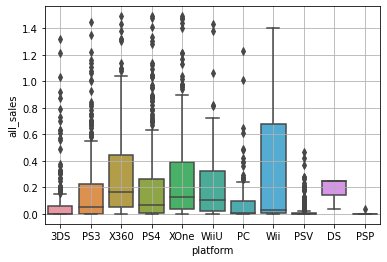

In [18]:
df = df.loc[df['all_sales']<1.5]
sns.boxplot(data=df, x='platform', y='all_sales')
plt.grid(visible=True)
plt.show()

Наиболее прибыльными являются диаграммы размаха, вытянутые вверх, такие как X360, XOne, Wii.

### Как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков

Одной из самых популярных потенциально прибыльных платформ является PS4. Рассмотрим зависимость продаж от отзывов для нее.

0.2686452612588224

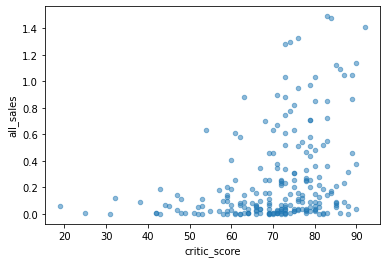

In [19]:
df.loc[(df['critic_score']>=0)&(df['platform']=='PS4')].plot.scatter(x="critic_score",
                         y="all_sales",
                         alpha=0.5);
df.loc[df['platform']=='PS4', 'critic_score'].corr(df['all_sales'])

0.17053080334355858

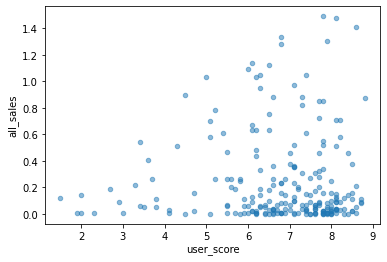

In [20]:
df.loc[(df['user_score']>=0)&(df['platform']=='PS4')].plot.scatter(x="user_score",
                         y="all_sales",
                         alpha=0.5);
df.loc[df['platform']=='PS4', 'user_score'].corr(df['all_sales'])

Линейная зависимость продаж от отзывов очень слабая. Зависимость продаж от отзывов критиков немного сильнее, чем зависимость продаж от отзывов пользователей. Коэффициенты корелляции:
 - критики: 0.26
 - пользователи: 0.17

### Продажи на других платформах

Аналогично исследуем зависимости продаж от отзывов для оставшихся потенциально прибыльных платформ.

Отзывы критиков
Коэффициент корелляции для XOne: 0.40057865937224746
Коэффициент корелляции для WiiU: 0.4153796215272096


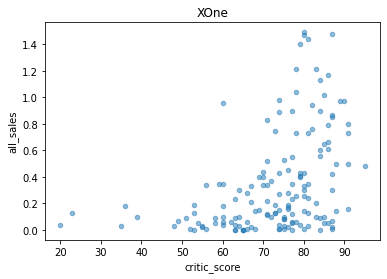

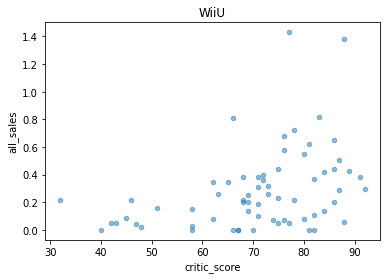

In [21]:
for platform in ['XOne', 'WiiU']:
    df.loc[(df['critic_score']>=0)&(df['platform']==platform)].plot.scatter(x="critic_score",
                         y="all_sales",
                         alpha=0.5, 
                         title=platform);
print('Отзывы критиков')
print('Коэффициент корелляции для XOne:', df.loc[df['platform']=='XOne', 'critic_score'].corr(df['all_sales']))
print('Коэффициент корелляции для WiiU:', df.loc[df['platform']=='WiiU', 'critic_score'].corr(df['all_sales']))

Отзывы пользователей
Коэффициент корелляции для XOne: 0.22426597369417797
Коэффициент корелляции для WiiU: 0.3254017592139535


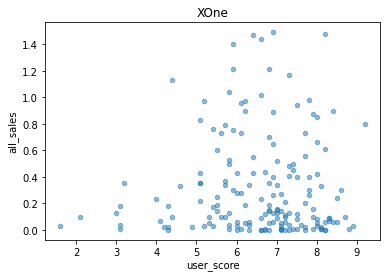

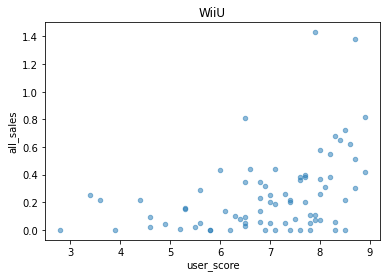

In [22]:
for platform in ['XOne', 'WiiU']:
    df.loc[(df['user_score']>=0)&(df['platform']==platform)].plot.scatter(x="user_score",
                         y="all_sales",
                         alpha=0.5,
                         title=platform);
print('Отзывы пользователей')
print('Коэффициент корелляции для XOne:', df.loc[df['platform']=='XOne', 'user_score'].corr(df['all_sales']))
print('Коэффициент корелляции для WiiU:', df.loc[df['platform']=='WiiU', 'user_score'].corr(df['all_sales']))

Зависимость по всем графикам больше напоминает экспоненту. Коэффициенты корелляции порядка 0.2-0.4 подтверждают наличие зависимости, но от линейной она далека.

### Распределение игр по жанрам

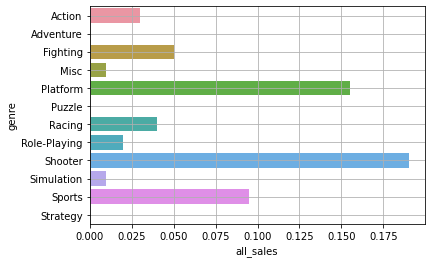

In [23]:
sns.barplot(x=df.groupby('genre')['all_sales'].median(), y=df.groupby('genre')['all_sales'].median().index)
plt.grid(visible=True)
plt.show()

Самые прибыльные жанры:
 - Platform
 - Shooter
 - Sports

Жанры с малым числом продажами:
    
  - Adventure
  - Puzzle
  - Misc
  - Simulation
  - Strategy

## Портрет пользователя каждого региона

### Самые популярные платформы

In [24]:
print('Северная Америка')
print(df.pivot_table(index='platform', values='na_sales', aggfunc=['sum'])
      .sort_values(by=('sum','na_sales'), ascending=False)
      .head())

Северная Америка
              sum
         na_sales
platform         
XOne        52.22
PS4         50.28
X360        44.79
PS3         38.47
WiiU        19.61


In [25]:
print('Европа')
print(df.pivot_table(index='platform', values='eu_sales', aggfunc=['sum'])
      .sort_values(by=('sum','eu_sales'), ascending=False)
      .head())

Европа
              sum
         eu_sales
platform         
PS4         68.05
PS3         39.72
XOne        34.39
X360        28.04
PC          25.27


In [26]:
print('Япония')
print(df.pivot_table(index='platform', values='jp_sales', aggfunc=['sum'])
      .sort_values(by=('sum','jp_sales'), ascending=False)
      .head())

Япония
              sum
         jp_sales
platform         
3DS         53.99
PS3         20.60
PSV         18.48
PS4         11.82
WiiU         6.60


Наибольшее число продаж происходит в Северной Америке, наименьшее в Японии. В каждом регионе наиболее популярными являются разные платформы(вероятно, из-за доступности этих платформ в конкретных регионах).
 - В Северной Америке - X360
 - В Европе - PS4
 - В Японии - 3DS

### Самые популярные жанры

In [27]:
print('Северная Америка')
print(df.pivot_table(index='genre', values='na_sales', aggfunc=['sum'])
      .sort_values(by=('sum','na_sales'), ascending=False)
      .head())

Северная Америка
                  sum
             na_sales
genre                
Action          76.95
Shooter         40.50
Sports          35.83
Role-Playing    27.73
Platform        15.80


In [28]:
print('Европа')
print(df.pivot_table(index='genre', values='eu_sales', aggfunc=['sum'])
      .sort_values(by=('sum','eu_sales'), ascending=False)
      .head())

Европа
                  sum
             eu_sales
genre                
Action          72.55
Sports          36.42
Shooter         35.70
Role-Playing    21.12
Racing          17.94


In [29]:
print('Япония')
print(df.pivot_table(index='genre', values='jp_sales', aggfunc=['sum'])
      .sort_values(by=('sum','jp_sales'), ascending=False)
      .head())

Япония
                  sum
             jp_sales
genre                
Role-Playing    40.85
Action          35.57
Misc             9.04
Adventure        5.82
Sports           5.05


Самый популярный жанр в Северной Америке и Европе - Action. В Японии самый популярный жанр - Role-Playing. Жанр Action - второй по популярности в Японии.

### Влияние рейтинга ESRB на продажи в отдельном регионе

In [30]:
print('Северная Америка')
print(df.pivot_table(index='rating', values='na_sales', aggfunc=['sum'])
      .sort_values(by=('sum','na_sales'), ascending=False)
      .head())

Северная Америка
            sum
       na_sales
rating         
M         75.65
E         44.88
E10+      44.11
None      42.55
T         36.99


In [31]:
print('Европа')
print(df.pivot_table(index='rating', values='eu_sales', aggfunc=['sum'])
      .sort_values(by=('sum','eu_sales'), ascending=False)
      .head())

Европа
            sum
       eu_sales
rating         
M         69.64
E         53.33
None      44.44
E10+      36.65
T         32.36


In [32]:
print('Япония')
print(df.pivot_table(index='rating', values='jp_sales', aggfunc=['sum'])
      .sort_values(by=('sum','jp_sales'), ascending=False)
      .head())

Япония
            sum
       jp_sales
rating         
None      71.26
T         19.59
E         11.23
M          9.02
E10+       4.27


В Северной Аерике и в Европе чаще всего покупают игры с рейтингом 'M' и 'E'. В Японии, самые продаваемые игры без рейтинга (у многих игр в этом регионе не выставлен рейтинг, поэтому нельзя достоверно назвать наиболее популярный рейтинг).

Система ESRB была создана в США и, судя по данным, не сильно распространена в Японии.

## Проверка гипотез

### Гипотеза: средние пользовательские рейтинги платформ Xbox One и PC одинаковые

H_0: Средние пользовательские рейтинги(user_score) платформы Xbox One = Средние пользовательские рейтинги(user_score) PC

H_a: Средние пользовательские рейтинги(user_score) платформы Xbox One ≠ Средние пользовательские рейтинги(user_score) PC

alpha = 0.05

In [33]:
df['user_score'].unique()

array([-1. ,  4.5,  4.2,  8.7,  6.8,  4.4,  7.7,  6.9,  3.9,  6.3,  8.1,
        7.8,  3.2,  5.5,  8.6,  9. ,  8.2,  7.9,  7.6,  7.3,  5.9,  5.4,
        6.6,  6.1,  5. ,  8.4,  7.4,  6.2,  8.5,  6. ,  4.7,  6.4,  7.1,
        7.5,  6.5,  8.8,  5.1,  5.8,  2.9,  8.9,  2.7,  2.2,  8. ,  3.5,
        5.7,  9.2,  7.2,  4.9,  8.3,  5.2,  5.6,  5.3,  4.3,  4.1,  3.4,
        7. ,  6.7,  3.1,  3.8,  4.6,  3.3,  9.3,  4. ,  3.6,  3. ,  3.7,
        2.4,  2.8,  1.8,  1.7,  4.8,  1.6,  2.1,  2. ,  1.5,  0.7,  2.5,
        0.2,  1.9,  1.3,  1. ,  1.4,  2.3])

**Критерий для проверки гипотез:**

Требуется проверка двусторонней гипотезы с большим количеством различных значений в выборке (>50).
- Генеральные совокупности ( df ['platform'] == 'XOne' и df ['platform'] == 'PC' ) не зависят друг от друга
- Выборочные средние должны быть нормально распределены (Соглсно ЦПТ, это условие выполнено для больших выборок, даже если сама генеральная совокупность не распределена нормально).
- Дисперсии рассматриваемых генеральных совокупностей должны быть равны (Выборки равные, нет оснований думать, что дисперсии разные)

Учитывая все вышесказаное, для проверки двусторонней гипотезы можно использовать распределение Стьюдента.

In [34]:
from scipy import stats as st

XOne = df[(df['platform']=='XOne')&(df['user_score']>=0)]['user_score']
PC = df[(df['platform']=='PC')&(df['user_score']>=0)]['user_score']
alpha = 0.05
results = st.ttest_ind(XOne, PC, equal_var=False)
print(results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')


0.09079436258033678
Не получилось отвергнуть нулевую гипотезу


### Гипотеза: средние пользовательские рейтинги жанров Action и Sports одинаковые

H_0: Средние пользовательские рейтинги(user_score) жанра Action = Средние пользовательские рейтинги(user_score) жанра Sports

H_a: Средние пользовательские рейтинги(user_score) жанра Action ≠ Средние пользовательские рейтинги(user_score) жанра Sports

alpha = 0.05

In [35]:
df['user_score'].unique()

array([-1. ,  4.5,  4.2,  8.7,  6.8,  4.4,  7.7,  6.9,  3.9,  6.3,  8.1,
        7.8,  3.2,  5.5,  8.6,  9. ,  8.2,  7.9,  7.6,  7.3,  5.9,  5.4,
        6.6,  6.1,  5. ,  8.4,  7.4,  6.2,  8.5,  6. ,  4.7,  6.4,  7.1,
        7.5,  6.5,  8.8,  5.1,  5.8,  2.9,  8.9,  2.7,  2.2,  8. ,  3.5,
        5.7,  9.2,  7.2,  4.9,  8.3,  5.2,  5.6,  5.3,  4.3,  4.1,  3.4,
        7. ,  6.7,  3.1,  3.8,  4.6,  3.3,  9.3,  4. ,  3.6,  3. ,  3.7,
        2.4,  2.8,  1.8,  1.7,  4.8,  1.6,  2.1,  2. ,  1.5,  0.7,  2.5,
        0.2,  1.9,  1.3,  1. ,  1.4,  2.3])

**Критерий для проверки гипотез:**

Требуется проверка двусторонней гипотезы с большим количеством различных значений в выборке (>50).
- Генеральные совокупности ( df ['genre'] == 'Action' и df ['genre'] == 'Sports' ) не зависят друг от друга
- Выборочные средние должны быть нормально распределены (Соглсно ЦПТ, это условие выполнено для больших выборок, даже если сама генеральная совокупность не распределена нормально).
- Дисперсии рассматриваемых генеральных совокупностей должны быть равны (Выборки равные, нет оснований думать, что дисперсии разные)

Учитывая все вышесказаное, для проверки двусторонней гипотезы можно использовать распределение Стьюдента.

In [36]:
Action = df[(df['genre']=='Action')&(df['user_score']>=0)]['user_score']
Sports = df[(df['genre']=='Sports')&(df['user_score']>=0)]['user_score']
alpha = 0.05
results = st.ttest_ind(Action, Sports, equal_var=False)
print(results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

3.2497577270761147e-17
Отвергаем нулевую гипотезу


Таким образом, не отвергнутые гипотезы:

    - средние пользовательские рейтинги платформ Xbox One и PC одинаковые
    - средние пользовательские рейтинги жанров Action и Sports разные

## Вывод

**В ходе исследования данных интернет-магазина была проделана работа и получены следующие результаты.**
 - Заменены названия столбцов 
 - Пропуски в данных изучены и устранены там, где это возможно. В столбцах с рейтингами пользователей и экспертов пропуски заменены на -1.
 - Изменены типы данных в соответствии с содержанием столбцов
 - Выполнена проверка на явные дубликаты, устранены дубликаты по столбцам 'name' и 'platform'.
 - Добавлен столбец с суммарными продажами по всем регионам 'all_sales'
 
**Проведен исследовательский анализ данных по итогам которого:**
  - До 1994 г. выпускалось значительно меньше игр, чем в остальное время;
  - Платформы с наибольшими суммарными продажами:
     - PS2
     - X360 
     - PS3
     - Wii
     - PS 
  - период популярности одной платформы - примерно 10 лет;

В качестве актуального периода для прогноза на 2017 год выбран период в 3 года. За это время можно будет отследить какие платформы находятся на пике продаж, а какие только набирают популярность.

**Анализ актуального периода:**
 - Потенциально прибыльные платформы: (подтверждено диаграммой размаха)
     - X360
     - XOne
     - WiiU 
     
Стоит отметить, что PC - самая стабильная платформа, которая существует уже более 20 лет. От нее нельзя ждать хорошей прибыли, но и в убыток она не уйдет.
    
 - Зависимость отзывов пользователей и критиков на продажи внутри одной популярной платформы по всем графикам больше напоминает экспоненту. Коэффициенты корреляции порядка 0.2-0.4 подтверждают наличие зависимости, но от линейной она далека.
 
 - Самые прибыльные жанры:
    - Platform
    - Shooter
    - Sports

**Портрет пользователя каждого региона:**


Наибольшее число продаж происходит в Северной Америке, наименьшее в Японии. В каждом регионе наиболее популярными являются разные платформы(вероятно, из-за доступности этих платформ в конкретных регионах).
 - В Северной Америке - X360
 - В Европе - PS4
 - В Японии - 3DS


Самый популярный жанр в Северной Америке и Европе - Action. В Японии самый популярный жанр - Role-Playing. Жанр Action - второй по популярности в Японии.

В Северной Америке и в Европе чаще всего покупают игры с рейтингом 'M' и 'E'. В Японии, самые продаваемые игры без рейтинга (у многих игр в этом регионе не выставлен рейтинг, поэтому нельзя достоверно назвать наиболее популярный рейтинг). Система ESRB в Японии не сильно распространена.

**Не отвергнутые гипотезы:**
- средние пользовательские рейтинги платформ Xbox One и PC одинаковые 
- средние пользовательские рейтинги жанров Action и Sports разные


Анализируя все вышесказанное, на 2017 год, предположительно, актуальными будут платформы PS4, XOne, WiiU;  жанры Platform, Shooter, Sports. С рейтингом 'M' и 'E'. 
